# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [5]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,154.6,23,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,299.0,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.lower().split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:05<00:00, 1679.70it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

## Number of Words in Essay

In [19]:
word_count_essay=[]
for count in project_data['essay']:
    lenth=len(count.split())
    word_count_essay.append(lenth)
project_data['Essay_length']=word_count_essay
project_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay,Essay_length
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,NaN,My students need opportunities to practice beg...,0,0,154.60,23,Literacy_Language,ESL Literacy,My students are English learners that are work...,272
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,NaN,My students need a projector to help with view...,7,1,299.00,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,221
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,...,NaN,"My students need shine guards, athletic socks,...",1,0,516.85,22,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",361
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,...,NaN,My students need to engage in Reading and Math...,4,1,232.90,4,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...,213
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",...,NaN,My students need hands on practice in mathemat...,1,1,67.98,4,Math_Science,Mathematics,Our second grade classroom next year will be m...,234


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[29999])
print("="*50)

Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Bodies in Motion Learn!


In [21]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.lower().split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 32303.57it/s]


In [22]:
# after preprocesing
print(preprocessed_project_title[0])
print("="*50)
print(preprocessed_project_title[50])
print("="*50)
print(preprocessed_project_title[10000])
print("="*50)

educational support english learners home
active energized
family book clubs


## Number of Words in Title

In [23]:
count_word_title=[]
for count in project_data['project_title']:
    total=len(count.split())
    count_word_title.append(total)
    
project_data['Title_word_count']=count_word_title
project_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay,Essay_length,Title_word_count
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,My students need opportunities to practice beg...,0,0,154.60,23,Literacy_Language,ESL Literacy,My students are English learners that are work...,272,7
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,My students need a projector to help with view...,7,1,299.00,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,221,5
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,...,"My students need shine guards, athletic socks,...",1,0,516.85,22,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",361,7
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,...,My students need to engage in Reading and Math...,4,1,232.90,4,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...,213,2
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",...,My students need hands on practice in mathemat...,1,1,67.98,4,Math_Science,Mathematics,Our second grade classroom next year will be m...,234,3


## Sentiment Scores for the essays

In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

positive = []
negative = []
neutral = []
compound = []

for pol in project_data["essay"] :
    p = analyser.polarity_scores(pol)['pos']
    n = analyser.polarity_scores(pol)['neg']
    o = analyser.polarity_scores(pol)['neu']
    c = analyser.polarity_scores(pol)['compound']
    positive.append(p)
    negative.append(n)
    neutral.append(o)
    compound.append(c)



In [25]:
project_data['pos']= positive
project_data['neg']= negative
project_data['neu']= neutral
project_data['compound']= compound
project_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,quantity,clean_categories,clean_subcategories,essay,Essay_length,Title_word_count,pos,neg,neu,compound
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,23,Literacy_Language,ESL Literacy,My students are English learners that are work...,272,7,0.081,0.008,0.911,0.9611
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,221,5,0.112,0.037,0.851,0.9267
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,...,22,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",361,7,0.179,0.058,0.764,0.9950
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,...,4,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...,213,2,0.214,0.052,0.733,0.9931
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",...,4,Math_Science,Mathematics,Our second grade classroom next year will be m...,234,3,0.087,0.016,0.897,0.9192


## 1.5 Preparing data for models

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'Essay_length', 'Title_word_count', 'pos', 'neg', 'neu', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## Train/Test Split and Cross Validation

In [27]:
#https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# create training and testing vars
X=project_data
Y=project_data['project_is_approved']
project_data.drop(['project_is_approved'], axis = 1, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, stratify = Y )
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.30, stratify=Y_train)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)
print(X_cv.shape, Y_cv.shape)

(53531, 25) (53531,)
(32775, 25) (32775,)
(22942, 25) (22942,)


# 1.5.1 Vectorizing Categorical data

## project_subject_categories

In [28]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
X_train_categories_one_hot = vectorizer.fit_transform(X_train['clean_categories'].values)
X_test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)
X_cv_categories_one_hot = vectorizer.transform(X_cv['clean_categories'].values)
print("After vectorizations")
print(X_train_categories_one_hot.shape, Y_train.shape)
print(X_cv_categories_one_hot.shape, Y_cv.shape)
print(X_test_categories_one_hot.shape, Y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(53531, 9) (53531,)
(22942, 9) (22942,)
(32775, 9) (32775,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


## Project_subject_subcategories

In [29]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_sub_categories_one_hot = vectorizer.fit_transform(X_train['clean_subcategories'].values)
X_test_sub_categories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)
X_cv_sub_categories_one_hot = vectorizer.transform(X_cv['clean_subcategories'].values)
print("After vectorizations")
print(X_train_sub_categories_one_hot.shape, Y_train.shape)
print(X_cv_sub_categories_one_hot.shape, Y_cv.shape)
print(X_test_sub_categories_one_hot.shape, Y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(53531, 30) (53531,)
(22942, 30) (22942,)
(32775, 30) (32775,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


## STATE

In [30]:
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)
X_train_school_state_categories_one_hot = vectorizer.fit_transform(X_train['school_state'].values)
X_test_school_state_categories_one_hot = vectorizer.transform(X_test['school_state'].values)
X_cv_school_state_categories_one_hot = vectorizer.transform(X_cv['school_state'].values)
print("After vectorizations")
print(X_train_school_state_categories_one_hot.shape, Y_train.shape)
print(X_cv_school_state_categories_one_hot.shape, Y_cv.shape)
print(X_test_school_state_categories_one_hot.shape, Y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(53531, 30) (53531,)
(22942, 30) (22942,)
(32775, 30) (32775,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


## TEACHER_PREFIX

In [31]:
X_train['teacher_prefix'] = X_train['teacher_prefix'].fillna('null') #to fill the empty or not defined value with nan
teacher_prefixes = list(X_train['teacher_prefix'].unique())
teacher_prefixes.remove('null')
vectorizer = CountVectorizer(vocabulary=teacher_prefixes)
vectorizer.fit(X_train['teacher_prefix'].values.astype(str))

X_train_teacher_prefix = vectorizer.fit_transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix = vectorizer.transform(X_test['teacher_prefix'].values.astype(str))
X_cv_teacher_prefix = vectorizer.transform(X_cv['teacher_prefix'].values.astype(str))
print("After vectorizations")
print(X_train_teacher_prefix.shape, Y_train.shape)
print(X_cv_teacher_prefix.shape, Y_cv.shape)
print(X_test_teacher_prefix.shape, Y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(53531, 5) (53531,)
(22942, 5) (22942,)
(32775, 5) (32775,)
['Ms.', 'Mrs.', 'Mr.', 'Teacher', 'Dr.']


## project_grade_category

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(project_data['project_grade_category'].unique()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values.astype(str))
X_train_grade = vectorizer.fit_transform(X_train['project_grade_category'].values)
X_test_grade = vectorizer.transform(X_test['project_grade_category'].values.astype(str))
X_cv_grade = vectorizer.transform(X_cv['project_grade_category'].values.astype(str))
print("After vectorizations")
print(X_train_grade.shape, Y_train.shape)
print(X_cv_grade.shape, Y_cv.shape)
print(X_test_grade.shape, Y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(53531, 4) (53531,)
(22942, 4) (22942,)
(32775, 4) (32775,)
['Grades PreK-2', 'Grades 6-8', 'Grades 3-5', 'Grades 9-12']


# 1.5.2 Vectorizing Numerical features

##  PRICE

In [36]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [37]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [38]:
from sklearn.preprocessing import Normalizer
normalizer_price = Normalizer()
normalizer_price.fit(X_train['price'].values.reshape(1,-1))
X_train_price = normalizer_price.fit_transform(X_train['price'].values.reshape(1,-1).transpose())
X_cv_price = normalizer_price.transform(X_cv['price'].values.reshape(1,-1).transpose())
X_test_price = normalizer_price.transform(X_test['price'].values.reshape(1,-1).transpose())
print("After vectorizations")
print(X_train_price.shape, Y_train.shape)
print(X_cv_price.shape, Y_cv.shape)
print(X_test_price.shape, Y_test.shape)


After vectorizations
(53531, 1) (53531,)
(22942, 1) (22942,)
(32775, 1) (32775,)


## teacher_number_of_previously_posted_projects

In [39]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_train_prev_project_norm =normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_cv_prev_project_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_test_prev_project_norm =normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
print("After vectorizations")
print(X_train_prev_project_norm.shape, Y_train.shape)
print(X_cv_prev_project_norm.shape, Y_cv.shape)
print(X_test_prev_project_norm.shape, Y_test.shape)

After vectorizations
(53531, 1) (53531,)
(22942, 1) (22942,)
(32775, 1) (32775,)


## Title word Count

In [40]:
normalizer = Normalizer()

normalizer.fit(X_train['Title_word_count'].values.reshape(-1,1))

title_word_count_train = normalizer.transform(X_train['Title_word_count'].values.reshape(1,-1).transpose())
title_word_count_cv = normalizer.transform(X_cv['Title_word_count'].values.reshape(1,-1).transpose())
title_word_count_test = normalizer.transform(X_test['Title_word_count'].values.reshape(1,-1).transpose())

print("After vectorizations")
print(title_word_count_train.shape, Y_train.shape)
print(title_word_count_cv.shape, Y_cv.shape)
print(title_word_count_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(53531, 1) (53531,)
(22942, 1) (22942,)
(32775, 1) (32775,)


## Essay word Count

In [41]:
normalizer = Normalizer()

normalizer.fit(X_train['Essay_length'].values.reshape(-1,1))

essay_word_count_train = normalizer.transform(X_train['Essay_length'].values.reshape(1,-1).transpose())
essay_word_count_cv = normalizer.transform(X_cv['Essay_length'].values.reshape(1,-1).transpose())
essay_word_count_test = normalizer.transform(X_test['Essay_length'].values.reshape(1,-1).transpose())

print("After vectorizations")
print(essay_word_count_train.shape, Y_train.shape)
print(essay_word_count_cv.shape, Y_cv.shape)
print(essay_word_count_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(53531, 1) (53531,)
(22942, 1) (22942,)
(32775, 1) (32775,)


## Essay Sentiments - pos

In [42]:
normalizer = Normalizer()

normalizer.fit(X_train['pos'].values.reshape(-1,1))

essay_sent_pos_train = normalizer.transform(X_train['pos'].values.reshape(1,-1).transpose())
essay_sent_pos_cv = normalizer.transform(X_cv['pos'].values.reshape(1,-1).transpose())
essay_sent_pos_test = normalizer.transform(X_test['pos'].values.reshape(1,-1).transpose())

print("After vectorizations")
print(essay_sent_pos_train.shape, Y_train.shape)
print(essay_sent_pos_cv.shape, Y_cv.shape)
print(essay_sent_pos_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(53531, 1) (53531,)
(22942, 1) (22942,)
(32775, 1) (32775,)


## Essay Sentiments - neg

In [43]:
normalizer = Normalizer()

normalizer.fit(X_train['neg'].values.reshape(-1,1))

essay_sent_neg_train = normalizer.transform(X_train['neg'].values.reshape(1,-1).transpose())
essay_sent_neg_cv = normalizer.transform(X_cv['neg'].values.reshape(1,-1).transpose())
essay_sent_neg_test = normalizer.transform(X_test['neg'].values.reshape(1,-1).transpose())

print("After vectorizations")
print(essay_sent_neg_train.shape, Y_train.shape)
print(essay_sent_neg_cv.shape, Y_cv.shape)
print(essay_sent_neg_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(53531, 1) (53531,)
(22942, 1) (22942,)
(32775, 1) (32775,)


## Essay Sentiments - neu

In [44]:
normalizer = Normalizer()

normalizer.fit(X_train['neu'].values.reshape(-1,1))

essay_sent_neu_train = normalizer.transform(X_train['neu'].values.reshape(1,-1).transpose())
essay_sent_neu_cv = normalizer.transform(X_cv['neu'].values.reshape(1,-1).transpose())
essay_sent_neu_test = normalizer.transform(X_test['neu'].values.reshape(1,-1).transpose())

print("After vectorizations")
print(essay_sent_neu_train.shape, Y_train.shape)
print(essay_sent_neu_cv.shape, Y_cv.shape)
print(essay_sent_neu_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(53531, 1) (53531,)
(22942, 1) (22942,)
(32775, 1) (32775,)


## Essay Sentiments - compound

In [45]:
normalizer = Normalizer()

normalizer.fit(X_train['compound'].values.reshape(-1,1))

essay_sent_comp_train = normalizer.transform(X_train['compound'].values.reshape(1,-1).transpose())
essay_sent_comp_cv = normalizer.transform(X_cv['compound'].values.reshape(1,-1).transpose())
essay_sent_comp_test = normalizer.transform(X_test['compound'].values.reshape(1,-1).transpose())
print("After vectorizations")
print(essay_sent_comp_train.shape, Y_train.shape)
print(essay_sent_comp_cv.shape, Y_cv.shape)
print(essay_sent_comp_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(53531, 1) (53531,)
(22942, 1) (22942,)
(32775, 1) (32775,)


In [46]:
normalizer = Normalizer()
normalizer.fit(X_train['quantity'].values.reshape(1,-1).transpose())

X_train_quantity_norm = normalizer.fit_transform(X_train['quantity'].values.reshape(1,-1).transpose())
X_cv_quantity_norm = normalizer.transform(X_cv['quantity'].values.reshape(1,-1).transpose())
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1).transpose())

print("After vectorizations")
print(X_train_quantity_norm.shape, Y_train.shape)
print(X_cv_quantity_norm.shape, Y_cv.shape)
print(X_test_quantity_norm.shape, Y_test.shape)

After vectorizations
(53531, 1) (53531,)
(22942, 1) (22942,)
(32775, 1) (32775,)


# 1.5.3 Vectorizing Text data

### 1.5.2.1 Bag of words(ESSAY)

In [47]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10, max_features=5000)
vectorizer.fit(X_train['essay'].values) 

X_train_essay_bow = vectorizer.fit_transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, Y_train.shape)
print(X_cv_essay_bow.shape, Y_cv.shape)
print(X_test_essay_bow.shape, Y_test.shape)

After vectorizations
(53531, 5000) (53531,)
(22942, 5000) (22942,)
(32775, 5000) (32775,)


## BOW(Title)

In [48]:
vectorizer = CountVectorizer(min_df=10, max_features=5000)
vectorizer.fit(X_train['project_title'].values) 

X_train_project_title_bow = vectorizer.fit_transform(X_train['project_title'].values)
X_cv_project_title_bow = vectorizer.transform(X_cv['project_title'].values)
X_test_project_title_bow = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_project_title_bow.shape, Y_train.shape)
print(X_cv_project_title_bow.shape, Y_cv.shape)
print(X_test_project_title_bow.shape, Y_test.shape)

After vectorizations
(53531, 2234) (53531,)
(22942, 2234) (22942,)
(32775, 2234) (32775,)


### 1.5.2.2 TFIDF vectorizer(ESSAY)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features=5000)
X_train_essay_tfidf = vectorizer.fit_transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, Y_train.shape)
print(X_cv_essay_tfidf.shape, Y_cv.shape)
print(X_test_essay_tfidf.shape, Y_test.shape)

After vectorizations
(53531, 5000) (53531,)
(22942, 5000) (22942,)
(32775, 5000) (32775,)


## TFIDF vectorizer(Title)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features=5000)
vectorizer.fit(X_train['project_title'].values) 

X_train_project_title_tfidf = vectorizer.fit_transform(X_train['project_title'].values)
X_cv_project_title_tfidf = vectorizer.transform(X_cv['project_title'].values)
X_test_project_title_tfidf = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_project_title_tfidf.shape, Y_train.shape)
print(X_cv_project_title_tfidf.shape, Y_cv.shape)
print(X_test_project_title_tfidf.shape, Y_test.shape)

After vectorizations
(53531, 2234) (53531,)
(22942, 2234) (22942,)
(32775, 2234) (32775,)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [51]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

'''
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

'''
words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


Loading Glove Model


1917495it [04:06, 7786.07it/s]


Done. 1917495  words loaded!
all the words in the coupus 15495364
the unique words in the coupus 58829
The number of words that are present in both glove vectors and our coupus 51363 ( 87.309 %)
word 2 vec length 51363


In [52]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [53]:
# average Word2Vec
# compute average word2vec for each review.
X_tr_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_tr_essay_avg_w2v.append(vector)

print(len(X_tr_essay_avg_w2v))
print(len(X_tr_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 53531/53531 [00:16<00:00, 3255.01it/s]


53531
300


In [54]:
X_te_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_te_essay_avg_w2v.append(vector)

print(len(X_te_essay_avg_w2v))
print(len(X_te_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 32775/32775 [00:10<00:00, 3233.28it/s]


32775
300


In [55]:
X_cv_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_essay_avg_w2v.append(vector)

print(len(X_cv_essay_avg_w2v))
print(len(X_cv_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 22942/22942 [00:07<00:00, 3252.32it/s]


22942
300


## Avg W2V(Title)

In [56]:
X_tr_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_tr_title_avg_w2v.append(vector)

print(len(X_tr_title_avg_w2v))
print(len(X_tr_title_avg_w2v[0]))

100%|████████████████████████████████████████████████████████████████████████| 53531/53531 [00:00<00:00, 174475.44it/s]


53531
300


In [57]:
X_te_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_te_title_avg_w2v.append(vector)

print(len(X_te_title_avg_w2v))
print(len(X_te_title_avg_w2v[0]))

100%|████████████████████████████████████████████████████████████████████████| 32775/32775 [00:00<00:00, 180192.73it/s]


32775
300


In [58]:
X_cv_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_title_avg_w2v.append(vector)

print(len(X_cv_title_avg_w2v))
print(len(X_cv_title_avg_w2v[0]))

100%|████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 176586.56it/s]


22942
300


## 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V(ESSAY)

In [59]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [60]:
# average Word2Vec
# compute average word2vec for each review.
X_tr_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_tr_tfidf_w2v_vectors.append(vector)

print(len(X_tr_tfidf_w2v_vectors))
print(len(X_tr_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 53531/53531 [02:23<00:00, 373.47it/s]


53531
300


In [61]:
# average Word2Vec
# compute average word2vec for each review.
X_cv_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_vectors.append(vector)

print(len(X_cv_tfidf_w2v_vectors))
print(len(X_cv_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22942/22942 [01:01<00:00, 373.37it/s]


22942
300


In [62]:
X_te_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_te_tfidf_w2v_vectors.append(vector)

print(len(X_te_tfidf_w2v_vectors))
print(len(X_te_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 32775/32775 [01:27<00:00, 374.74it/s]


32775
300


## Similarly you can vectorize for title also
## itle(TFIDF-AVG W2V)

In [63]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [64]:
X_train_project_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_train['project_title']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v 
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_project_title_tfidf_w2v.append(vector)
print(len(X_train_project_title_tfidf_w2v))
print(len(X_train_project_title_tfidf_w2v[0]))

53531
300


In [65]:
X_cv_project_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_cv['project_title']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v 
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_project_title_tfidf_w2v.append(vector)
print(len(X_cv_project_title_tfidf_w2v))
print(len(X_cv_project_title_tfidf_w2v[0]))

22942
300


In [66]:
X_test_project_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_test['project_title']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v 
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_project_title_tfidf_w2v.append(vector)
print(len(X_test_project_title_tfidf_w2v))
print(len(X_test_project_title_tfidf_w2v[0]))

32775
300


# Assignment 7: SVM

## Training model for set 1; BOW:

In [67]:
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_teacher_prefix,X_train_grade,
X_train_price,X_train_prev_project_norm,X_train_essay_bow, X_train_project_title_bow)).tocsr()

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_teacher_prefix,X_cv_grade,
X_cv_price,X_cv_prev_project_norm,X_cv_essay_bow,X_cv_project_title_bow)).tocsr()

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_teacher_prefix,X_test_grade,
X_test_price,X_test_prev_project_norm,X_test_essay_bow,X_test_project_title_bow)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(53531, 7314) (53531,)
(22942, 7314) (22942,)
(32775, 7314) (32775,)


In [68]:
X_tr = X_tr.toarray()
X_cr = X_cr.toarray()
X_te = X_te.toarray()

In [69]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
alpha = [10**i for i in range(-4,4)]
train_auc = list()
cv_auc = list()
for c in alpha:
    svm = SGDClassifier(alpha = c, class_weight='balanced')
    svm.fit(X_tr, Y_train) 

    Y_probs_tr = svm.decision_function(X_tr)
    Y_probs_cr = svm.decision_function(X_cr)
     
    train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
    cv_auc.append(roc_auc_score(Y_cv, Y_probs_cr))

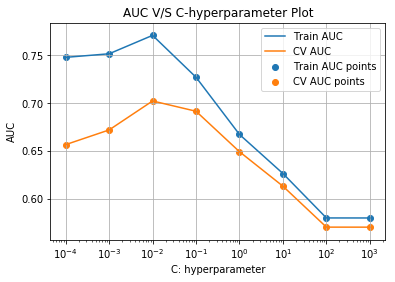

In [70]:
from matplotlib import pyplot as plt
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xscale('log')
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S C-hyperparameter Plot")
plt.grid()
plt.show()

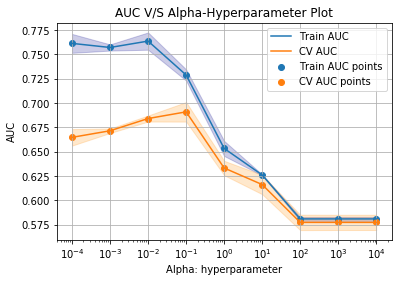

In [71]:
from sklearn.model_selection import GridSearchCV
svm = SGDClassifier(class_weight='balanced')
parameters = {'alpha': [10**i for i in range(-4, 5)]}
clf = GridSearchCV(svm, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.plot(parameters['alpha'], train_auc, label='Train AUC')

# https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S Alpha-Hyperparameter Plot")
plt.grid()
plt.show()

Train AUC: 0.733
Test AUC: 0.710


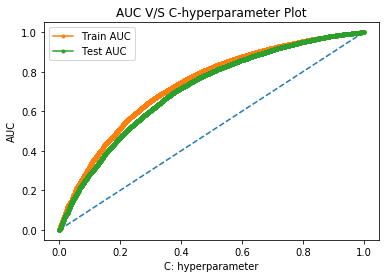

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

model_M = SGDClassifier(alpha=0.1, class_weight='balanced')
model_M.fit(X_tr, Y_train)
Y_probs_train = model_M.decision_function(X_tr)
Y_probs_test = model_M.decision_function(X_te)
Y_predicted = model_M.predict(X_te)
Y_predicted_tr = model_M.predict(X_tr)

# calculate AUC
train_auc = roc_auc_score(Y_train, Y_probs_train)
test_auc = roc_auc_score(Y_test, Y_probs_test)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, Y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, Y_probs_test)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
pyplot.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
pyplot.legend()
pyplot.xlabel("C: hyperparameter")
pyplot.ylabel("AUC")
pyplot.title("AUC V/S C-hyperparameter Plot")
# show the plot
pyplot.show()

## Confusion Matrix : Train And Test

Confusion matrix: 
 [[ 6350  1755]
 [20692 24734]]


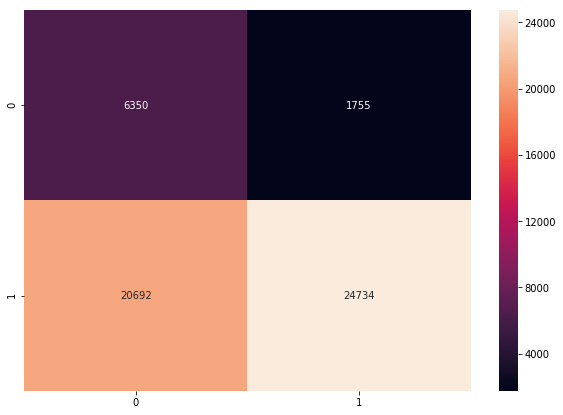

In [73]:
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
cma_BOW = confusion_matrix(Y_train, Y_predicted_tr)
print("Confusion matrix: \n", cma_BOW)
df_cm_BOW = pd.DataFrame(cma_BOW, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_BOW, annot=True, fmt='g')

Confusion matrix: 
 [[ 3706  1257]
 [12662 15150]]


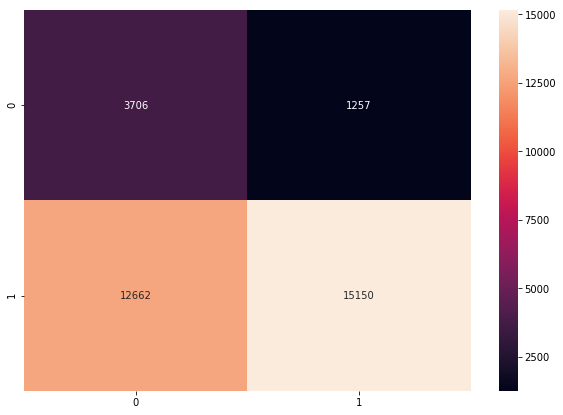

In [74]:
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
cma_BOW = confusion_matrix(Y_test, Y_predicted)
print("Confusion matrix: \n", cma_BOW)
df_cm_BOW = pd.DataFrame(cma_BOW, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_BOW, annot=True, fmt='g')

## Training model for set 2- TFIDF:

In [75]:
# Please write all the code with proper documentation
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_teacher_prefix,X_train_grade,
X_train_price,X_train_prev_project_norm,X_train_essay_tfidf,X_train_project_title_tfidf)).tocsr()

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_teacher_prefix,X_cv_grade,
X_cv_price,X_cv_prev_project_norm,X_cv_essay_tfidf,X_cv_project_title_tfidf)).tocsr()

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_teacher_prefix,X_test_grade,
X_test_price,X_test_prev_project_norm,X_test_essay_tfidf,X_test_project_title_tfidf)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(53531, 7314) (53531,)
(22942, 7314) (22942,)
(32775, 7314) (32775,)


In [76]:
X_tr = X_tr.toarray()
X_cr = X_cr.toarray()
X_te = X_te.toarray()

In [77]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
alpha = [10**i for i in range(-4,4)]
train_auc = list()
cv_auc = list()
for c in alpha:
    svm = SGDClassifier(alpha = c, class_weight='balanced')
    svm.fit(X_tr, Y_train) 

    Y_probs_tr = svm.decision_function(X_tr)
    Y_probs_cr = svm.decision_function(X_cr)
     
    train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
    cv_auc.append(roc_auc_score(Y_cv, Y_probs_cr))

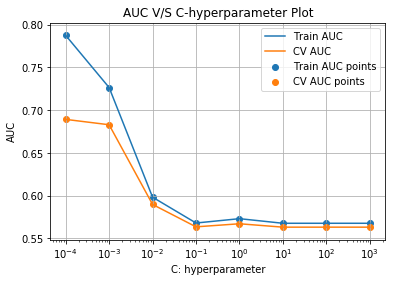

In [78]:
from matplotlib import pyplot as plt
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xscale('log')
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S C-hyperparameter Plot")
plt.grid()
plt.show()

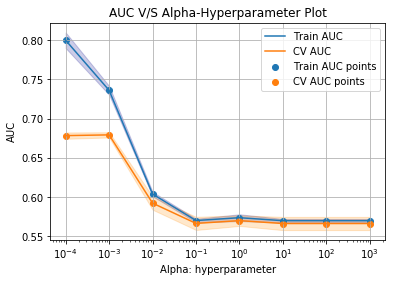

In [79]:
from sklearn.model_selection import GridSearchCV
svm = SGDClassifier(class_weight='balanced')
parameters = {'alpha': [10**i for i in range(-4, 4)]}
clf = GridSearchCV(svm, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.plot(parameters['alpha'], train_auc, label='Train AUC')

# https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S Alpha-Hyperparameter Plot")
plt.grid()
plt.show()

Train AUC: 0.793
Test AUC: 0.705


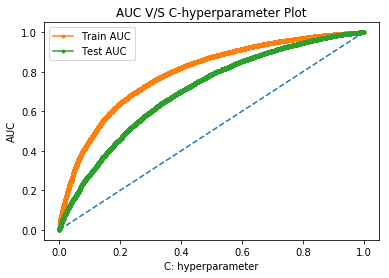

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

model_M = SGDClassifier(alpha=0.0001, class_weight='balanced')
model_M.fit(X_tr, Y_train)
Y_probs_train = model_M.decision_function(X_tr)
Y_probs_test = model_M.decision_function(X_te)
Y_predicted = model_M.predict(X_te)
Y_predicted_tr = model_M.predict(X_tr)

# calculate AUC
train_auc = roc_auc_score(Y_train, Y_probs_train)
test_auc = roc_auc_score(Y_test, Y_probs_test)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, Y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, Y_probs_test)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
pyplot.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
pyplot.legend()
pyplot.xlabel("C: hyperparameter")
pyplot.ylabel("AUC")
pyplot.title("AUC V/S C-hyperparameter Plot")
# show the plot
pyplot.show()

Confusion matrix: 
 [[ 2434  5671]
 [ 2421 43005]]


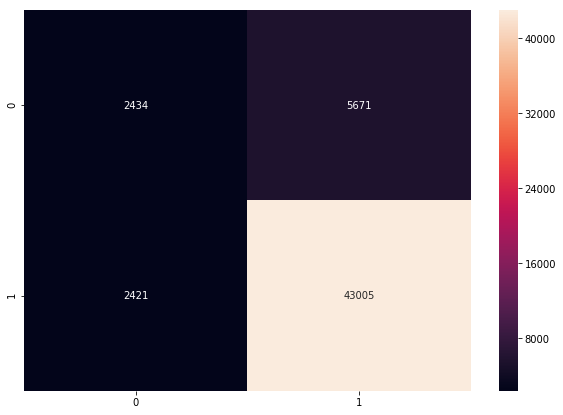

In [81]:
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
cma_TFIDF = confusion_matrix(Y_train, Y_predicted_tr)
print("Confusion matrix: \n", cma_TFIDF)
df_cm_TFIDF = pd.DataFrame(cma_TFIDF, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_TFIDF, annot=True, fmt='g')

Confusion matrix: 
 [[ 1100  3863]
 [ 1735 26077]]


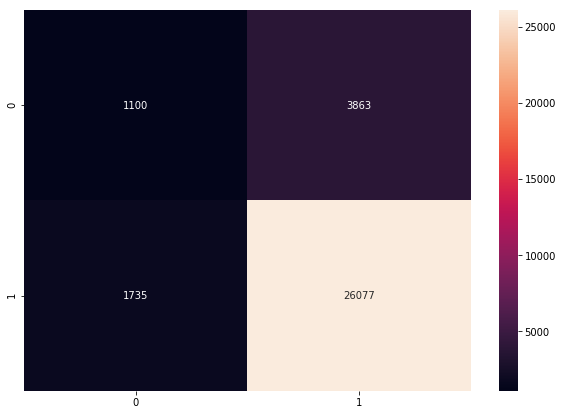

In [82]:
cma_TFIDF = confusion_matrix(Y_test, Y_predicted)
print("Confusion matrix: \n", cma_TFIDF)
df_cm_TFIDF = pd.DataFrame(cma_TFIDF, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_TFIDF, annot=True, fmt='g')

## Training model for set 3; AVG W2V:

In [83]:
# Please write all the code with proper documentation
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_teacher_prefix,X_train_grade,
X_train_price,X_train_prev_project_norm,X_tr_essay_avg_w2v,X_tr_title_avg_w2v)).tocsr()

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_teacher_prefix,X_cv_grade,
X_cv_price,X_cv_prev_project_norm,X_cv_essay_avg_w2v,X_cv_title_avg_w2v)).tocsr()

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_teacher_prefix,X_test_grade,
X_test_price,X_test_prev_project_norm,X_te_essay_avg_w2v,X_te_title_avg_w2v)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(53531, 680) (53531,)
(22942, 680) (22942,)
(32775, 680) (32775,)


In [84]:
X_tr = X_tr.toarray()
X_cr = X_cr.toarray()
X_te = X_te.toarray()

In [85]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
alpha = [10**i for i in range(-4,4)]
train_auc = list()
cv_auc = list()
for c in alpha:
    svm = SGDClassifier(alpha = c, class_weight='balanced')
    svm.fit(X_tr, Y_train) 

    Y_probs_tr = svm.decision_function(X_tr)
    Y_probs_cr = svm.decision_function(X_cr)
     
    train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
    cv_auc.append(roc_auc_score(Y_cv, Y_probs_cr))

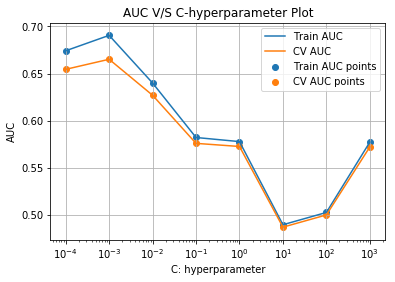

In [86]:
from matplotlib import pyplot as plt
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xscale('log')
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S C-hyperparameter Plot")
plt.grid()
plt.show()

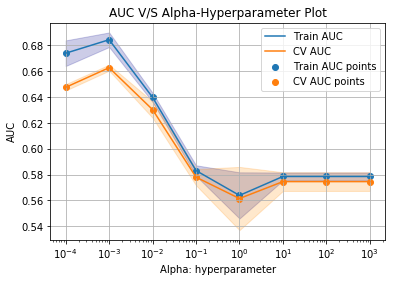

In [87]:
from sklearn.model_selection import GridSearchCV
svm = SGDClassifier(class_weight='balanced')
parameters = {'alpha': [10**i for i in range(-4, 4)]}
clf = GridSearchCV(svm, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.plot(parameters['alpha'], train_auc, label='Train AUC')

# https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S Alpha-Hyperparameter Plot")
plt.grid()
plt.show()

Train AUC: 0.666
Test AUC: 0.659


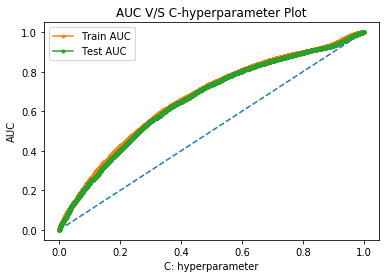

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

model_M = SGDClassifier(alpha=0.0001, class_weight='balanced')
model_M.fit(X_tr, Y_train)
Y_probs_train = model_M.decision_function(X_tr)
Y_probs_test = model_M.decision_function(X_te)
Y_predicted = model_M.predict(X_te)
Y_predicted_tr = model_M.predict(X_tr)

# calculate AUC
train_auc = roc_auc_score(Y_train, Y_probs_train)
test_auc = roc_auc_score(Y_test, Y_probs_test)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, Y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, Y_probs_test)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
pyplot.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
pyplot.legend()
pyplot.xlabel("C: hyperparameter")
pyplot.ylabel("AUC")
pyplot.title("AUC V/S C-hyperparameter Plot")
# show the plot
pyplot.show()

Confusion matrix: 
 [[ 7893   212]
 [41343  4083]]


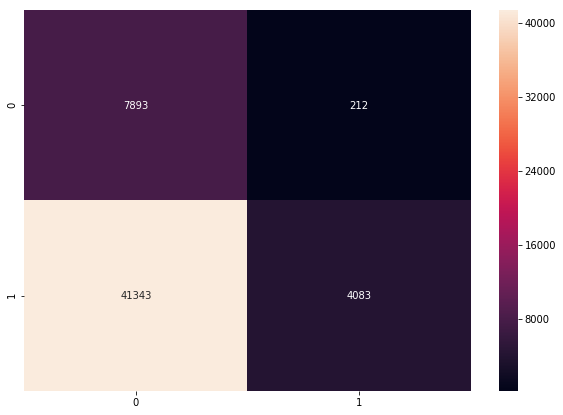

In [89]:
cma_AVG_W2V = confusion_matrix(Y_train, Y_predicted_tr)
print("Confusion matrix: \n", cma_AVG_W2V)
df_cm_AVG_W2V = pd.DataFrame(cma_AVG_W2V, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_AVG_W2V, annot=True, fmt='g')

Confusion matrix: 
 [[ 4805   158]
 [25245  2567]]


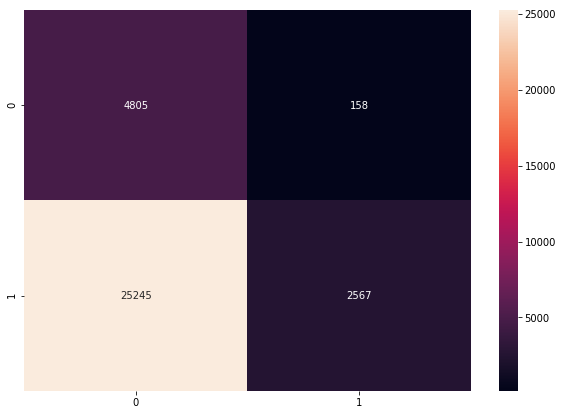

In [90]:
cma_AVG_W2V = confusion_matrix(Y_test, Y_predicted)
print("Confusion matrix: \n", cma_AVG_W2V)
df_cm_AVG_W2V = pd.DataFrame(cma_AVG_W2V, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_AVG_W2V, annot=True, fmt='g')

## Training model for set 4;TFIDF-AVG W2V:

In [91]:
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_teacher_prefix,X_train_grade,
X_train_price,X_train_prev_project_norm,X_tr_tfidf_w2v_vectors,X_train_project_title_tfidf_w2v)).tocsr()

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_teacher_prefix,X_cv_grade,
X_cv_price,X_cv_prev_project_norm,X_cv_tfidf_w2v_vectors,X_cv_project_title_tfidf_w2v)).tocsr()

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_teacher_prefix,X_test_grade,
X_test_price,X_test_prev_project_norm,X_te_tfidf_w2v_vectors,X_test_project_title_tfidf_w2v)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(53531, 680) (53531,)
(22942, 680) (22942,)
(32775, 680) (32775,)


In [92]:
X_tr = X_tr.toarray()
X_cr = X_cr.toarray()
X_te = X_te.toarray()

In [93]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
alpha = [10**i for i in range(-4,4)]
train_auc = list()
cv_auc = list()
for c in alpha:
    svm = SGDClassifier(alpha = c, class_weight='balanced')
    svm.fit(X_tr, Y_train) 

    Y_probs_tr = svm.decision_function(X_tr)
    Y_probs_cr = svm.decision_function(X_cr)
     
    train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
    cv_auc.append(roc_auc_score(Y_cv, Y_probs_cr))

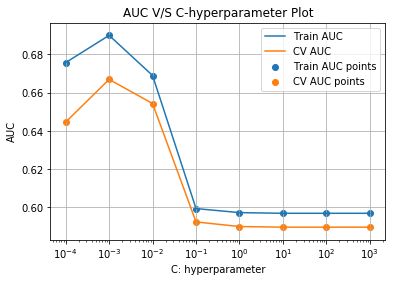

In [94]:
from matplotlib import pyplot as plt
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xscale('log')
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S C-hyperparameter Plot")
plt.grid()
plt.show()

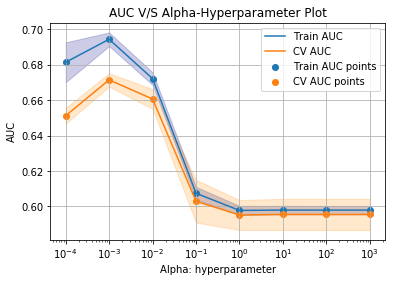

In [95]:
from sklearn.model_selection import GridSearchCV
svm = SGDClassifier(class_weight='balanced')
parameters = {'alpha': [10**i for i in range(-4, 4)]}
clf = GridSearchCV(svm, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.plot(parameters['alpha'], train_auc, label='Train AUC')

# https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S Alpha-Hyperparameter Plot")
plt.grid()
plt.show()

Train AUC: 0.682
Test AUC: 0.660


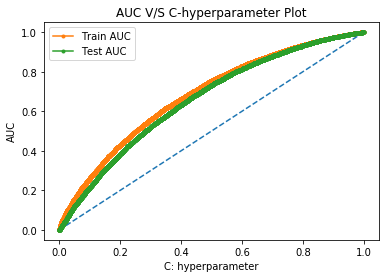

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

model_M = SGDClassifier(alpha=0.0001, class_weight='balanced')
model_M.fit(X_tr, Y_train)
Y_probs_train = model_M.decision_function(X_tr)
Y_probs_test = model_M.decision_function(X_te)
Y_predicted = model_M.predict(X_te)
Y_predicted_tr = model_M.predict(X_tr)

# calculate AUC
train_auc = roc_auc_score(Y_train, Y_probs_train)
test_auc = roc_auc_score(Y_test, Y_probs_test)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, Y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, Y_probs_test)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
pyplot.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
pyplot.legend()
pyplot.xlabel("C: hyperparameter")
pyplot.ylabel("AUC")
pyplot.title("AUC V/S C-hyperparameter Plot")
# show the plot
pyplot.show()

## Confusion Matrix : Train And Test

Confusion matrix: 
 [[  430  7675]
 [  557 44869]]


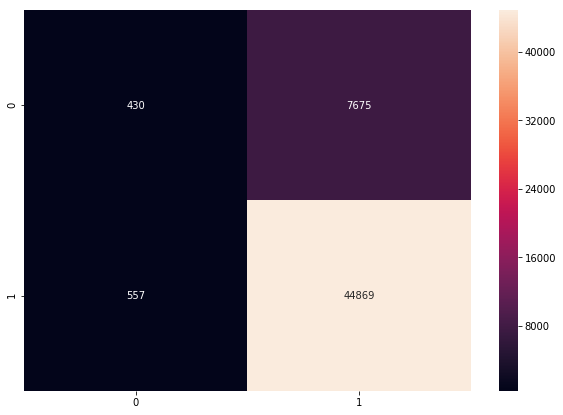

In [97]:
cma_TFIDF_AVG = confusion_matrix(Y_train, Y_predicted_tr)
print("Confusion matrix: \n", cma_TFIDF_AVG)
df_cm_TFIDF_AVG = pd.DataFrame(cma_TFIDF_AVG, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_TFIDF_AVG, annot=True, fmt='g')

Confusion matrix: 
 [[  233  4730]
 [  304 27508]]


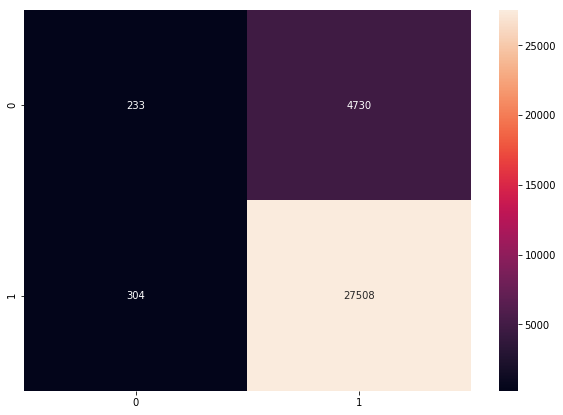

In [98]:
cma_TFIDF_AVG = confusion_matrix(Y_test, Y_predicted)
print("Confusion matrix: \n", cma_TFIDF_AVG)
df_cm_TFIDF_AVG = pd.DataFrame(cma_TFIDF_AVG, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_TFIDF_AVG, annot=True, fmt='g')

<h2>2.5 SVM with added Features `Set 5` </h2>

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [14:19<00:00, 212.46s/it]


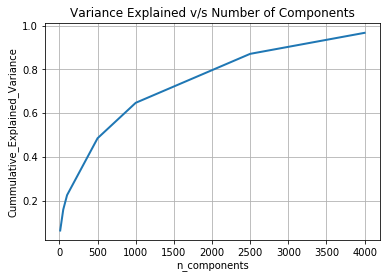

In [99]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
from sklearn.decomposition import TruncatedSVD
n_components = [10, 50, 100, 500, 1000, 2500, 4000]
variance_explained = []
for i in tqdm(n_components):
    svd = TruncatedSVD(n_components= i)
    svd.fit(X_train_essay_tfidf)
    variance_explained.append(svd.explained_variance_ratio_.sum())
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cummulative_Explained_Variance")
plt.title("Variance Explained v/s Number of Components")
plt.plot(n_components,variance_explained,lw=2)
plt.show()

In [100]:
variance_explained

[0.06451586143666199,
 0.16010006827099496,
 0.22605472007338404,
 0.48581538486241715,
 0.6475580014649674,
 0.8711041554812415,
 0.9670327549746862]

In [101]:
#Takng no of componet as 2500 
svd = TruncatedSVD(n_components= 2500)
svd.fit(X_train_essay_tfidf)
X_svd_train = svd.transform(X_train_essay_tfidf)
X_svd_cv = svd.transform(X_cv_essay_tfidf)
X_svd_test = svd.transform(X_test_essay_tfidf)

In [102]:
print(X_svd_train.shape)
print(X_svd_cv.shape)
print(X_svd_test.shape)

(53531, 2500)
(22942, 2500)
(32775, 2500)


In [103]:
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_teacher_prefix,X_train_grade,
X_train_price,X_train_prev_project_norm,title_word_count_train,essay_word_count_train,essay_sent_pos_train,essay_sent_neg_train,essay_sent_neu_train,essay_sent_comp_train,X_train_quantity_norm,X_svd_train)).tocsr()

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_teacher_prefix,X_cv_grade,
X_cv_price,X_cv_prev_project_norm,title_word_count_cv,essay_word_count_cv,essay_sent_pos_cv,essay_sent_neg_cv,essay_sent_neu_cv,essay_sent_comp_cv,X_cv_quantity_norm,X_svd_cv)).tocsr()

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_teacher_prefix,X_test_grade,
X_test_price,X_test_prev_project_norm,title_word_count_test,essay_word_count_test,essay_sent_pos_test,essay_sent_neg_test,essay_sent_neu_test,essay_sent_comp_test,X_test_quantity_norm,X_svd_test)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(53531, 2587) (53531,)
(22942, 2587) (22942,)
(32775, 2587) (32775,)


In [104]:
X_tr = X_tr.toarray()
X_cr = X_cr.toarray()
X_te = X_te.toarray()

In [105]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
alpha = [10**i for i in range(-4,4)]
train_auc = list()
cv_auc = list()
for c in alpha:
    svm = SGDClassifier(alpha = c, class_weight='balanced')
    svm.fit(X_tr, Y_train) 

    Y_probs_tr = svm.decision_function(X_tr)
    Y_probs_cr = svm.decision_function(X_cr)
     
    train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
    cv_auc.append(roc_auc_score(Y_cv, Y_probs_cr))

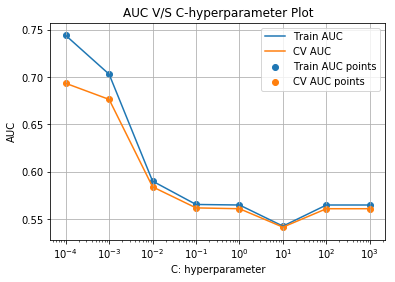

In [106]:
from matplotlib import pyplot as plt
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xscale('log')
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S C-hyperparameter Plot")
plt.grid()
plt.show()

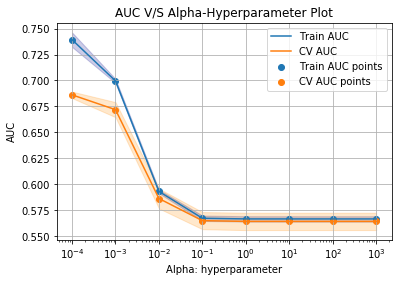

In [107]:
from sklearn.model_selection import GridSearchCV
svm = SGDClassifier(class_weight='balanced')
parameters = {'alpha': [10**i for i in range(-4, 4)]}
clf = GridSearchCV(svm, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.plot(parameters['alpha'], train_auc, label='Train AUC')

# https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC V/S Alpha-Hyperparameter Plot")
plt.grid()
plt.show()

Train AUC: 0.731
Test AUC: 0.692


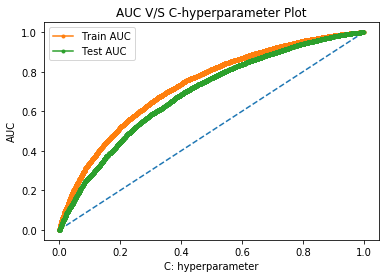

In [108]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

model_M = SGDClassifier(alpha=0.0001, class_weight='balanced')
model_M.fit(X_tr, Y_train)
Y_probs_train = model_M.decision_function(X_tr)
Y_probs_test = model_M.decision_function(X_te)
Y_predicted = model_M.predict(X_te)
Y_predicted_tr = model_M.predict(X_tr)

# calculate AUC
train_auc = roc_auc_score(Y_train, Y_probs_train)
test_auc = roc_auc_score(Y_test, Y_probs_test)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, Y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, Y_probs_test)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
pyplot.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
pyplot.legend()
pyplot.xlabel("C: hyperparameter")
pyplot.ylabel("AUC")
pyplot.title("AUC V/S C-hyperparameter Plot")
# show the plot
pyplot.show()

## Confusion Matrix : Train And Test

Confusion matrix: 
 [[ 7548   557]
 [33481 11945]]


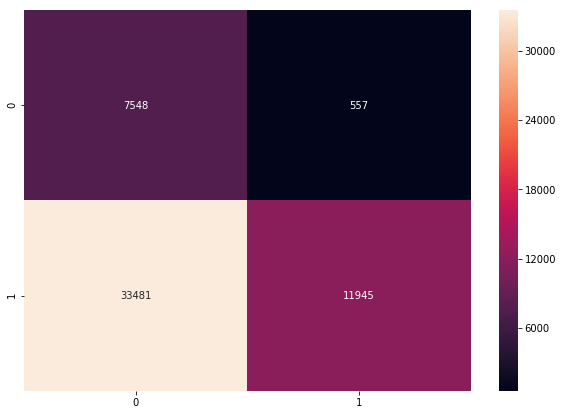

In [109]:
cma = confusion_matrix(Y_train, Y_predicted_tr)
print("Confusion matrix: \n", cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Confusion matrix: 
 [[ 4491   472]
 [20561  7251]]


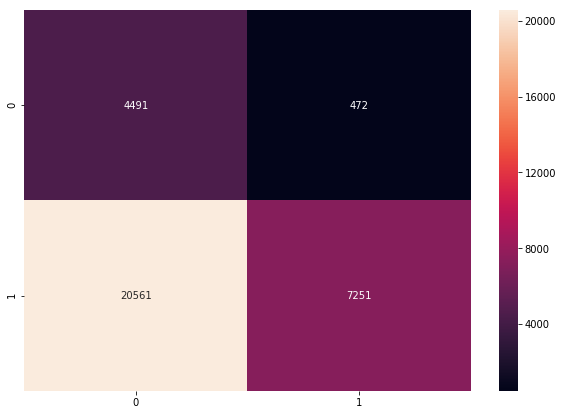

In [110]:
cma = confusion_matrix(Y_test, Y_predicted)
print("Confusion matrix: \n", cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

<h1>3. Conclusion</h1>

In [112]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "C-Hyper Parameter", "AUC"]
x.add_row(["BOW", 0.1, 0.710])
x.add_row(["TFIDF", 0.0001, 0.705])
x.add_row(["AVG W2V", 0.0001, 0.659])
x.add_row(["TFIDF W2V", 0.0001, 0.660])
x.add_row(["SET 5", 0.0001, 0.692])
print(x)

+------------+-------------------+-------+
| Vectorizer | C-Hyper Parameter |  AUC  |
+------------+-------------------+-------+
|    BOW     |        0.1        |  0.71 |
|   TFIDF    |       0.0001      | 0.705 |
|  AVG W2V   |       0.0001      | 0.659 |
| TFIDF W2V  |       0.0001      |  0.66 |
|   SET 5    |       0.0001      | 0.692 |
+------------+-------------------+-------+
